# Bayesian Thinking: AB Testing & Evaluation (ROPE, Effect Size and Lift)

* In this notebook, we are going to see how <b>Bayesian framework can help provide improvements to traditional Frequentist AB Testing.</b> As we saw in a [previous post about Frequentist AB Testing](https://github.com/AdiVarma27/AdiVarma27.github.io/blob/master/_jupyter/2020-04-10-Hypothesis%20Testing%2C%20Click-Through-Rate%20for%20Banner%20Ads%20(AB%20Testing).ipynb), we conducted an experiment to understand which version of Banner Ads attracts customers to click on them, so that we can decide which version to finally publish on to the website. 


* To do so, we looked at how we can choose a <b>sample size in advance based on the number of daily users, Type-I and Type-II Error rates.</b> We observed that <b>version-B had a statistically significant higher CTR (point estimate)</b>, when compared to version-a Banner Ad.

## Frequentist vs Bayesian Framework

* In our previous frequentist approach, we send every new customer randomly to either the control or treatment groups/ version of the banner Ads. To validate our hypothesis that the new banner might work better. We calculate the Click-Through-Rates for both versions (Successful Clicks/ Total Impressions) per banner, and a conduct One Tailed, Two sample proportion test, and come up with a <b>corresponding Z-stat and p-value.</b> In this framework, we assume there is some ground truth, and by sampling more data. <b>It assumes that we can tend to the ground truth by enough sampling.</b>


* <b>Bayesian framework does not assume pint estimates (no single value of the ground truth), but provides a distribution or range, where the ground truth could lie in, with some confidence.</b> It assumes that we have some prior (Weak/ Strong), and as we keep sampling more data, our posterior probability tends to the <b>underlying distribution of the ground truth.</b>


## Wise vs Rigid Bayesian Priors

* In Bayesian way of thinking, there is some <b>prior we know works well</b>. Without any data, this is our <b>best guess from previous experiences/ Business expertise.</b> For Banner Ads in e-commerce space, the main banner which shows up beside the website heading could have a Click-through-rate of 10 % (Note that we need not be super confident about it). As our statistics (that CTR for banner ads in a specific location is 10 %), comes from previous data from our website, but over little sampling data, we maynot be confident in our prior.


* Let us say we own an online book-store and have thousands of customers who visit us everyday. We are <b><i>'wiser'</i></b> in some sense due to the experience we gain from our customers, and we know with high confidence that CTR is around 20 % for online bookstore Banner Ad. In this case, our priors can be stronger, and Hence <b><i>'tougher'</i></b> in some sense to change our belief system.


* Having extremely strong priors, defeats the purpouse of experimentation (where we are open to change our belief and account both experience + exploration), and is no more <b><i>'wise'</i></b>, and starts to tend towards <b><i>'rigid'</i></b>. 

## Beta Distribution and Priors

* Let us see how Beta Distribution (Prior of Bernoulli Distribution), can help form excellent priors by tweaking its alpha and beta parameters. the parameter alpha can be modelled as number of successes and beta can be modelled as number of faliures.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

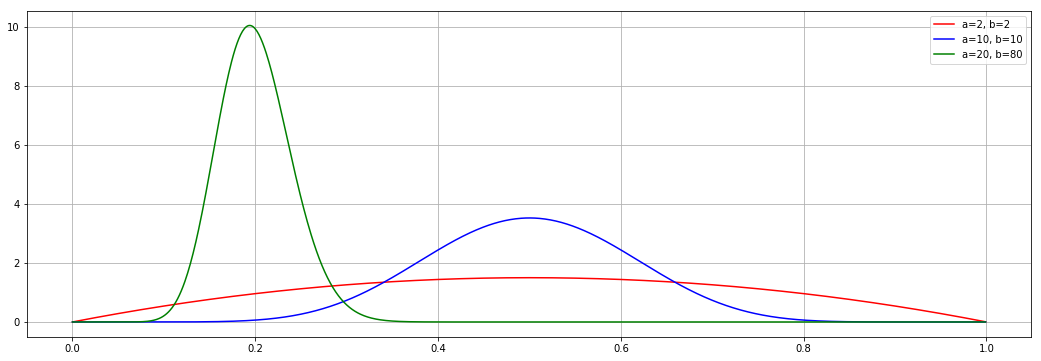

In [2]:
plt.figure(figsize=(18,6))
x = np.arange(0,1,0.001); y0 = beta.pdf(x, 2, 2); y1 = beta.pdf(x, 10, 10);  y2 = beta.pdf(x, 20, 80)
plt.plot(x, y0, label='a=2, b=2',c='r'); plt.plot(x, y1, label='a=10, b=10',c='b')
plt.plot(x, y2, label='a=20, b=80',c='g')
plt.grid()
plt.legend()

* Observe that the <b>red distribution has weak priors</b>, Hence gives low confidence for a larger range of values. The blue distribution with a=10 and b=10, even though has the <b>same ratio as red distribution (a=2, b=2), is slightly less deviated from the mean (a/(a+b)), and is more confident.</b> The distribution in green has high confidence around the mean, with mean value of (0.2). Hence, the <b>red and blue distributions are weak priors, whereas the green distribution is 'wise'.</b>


* The green distribution has <b>alpha=20 and beta=80; and is modelled directly as 20 successful clicks and 80 unsuccessful clicks, with mean CTR of (20/(20+80)) = 20 %</b> Let us stick to this prior for now, and see how the posterior looks like.

## Conducting Experiment

* Let us say we conducted the expriment and let it run for two days, after end of two days, here are the clicks and impressions for both versions. We observe that the CTR for version-a and version-b are 19.6 % and 26.5 % respectively. We also conduct a One tailed two sample proportion test, and observe t-value > 1.645.

In [3]:
# data from experiment
df = pd.DataFrame()
df['clicks_success'] = [192, 270]
df['impressions'] = [980, 1020]
df.index= ['version_a', 'version_b']
df['ctr'] = df['clicks_success']/df['impressions']
df['clicks_faliure'] = df['impressions'] - df['clicks_success']
df

,clicks_success,impressions,ctr,clicks_faliure
version_a,192,980,0.195918,788
version_b,270,1020,0.264706,750


In [4]:
p = (192 + 270)/(980 + 1020)
SE = np.sqrt(p*(1-p)*( (1/980)  +  (1/1020) ))
t = (0.264706 - 0.195918)/(SE)

t, SE

(3.6487293376341263, 0.018852590486912586)

## Updating Belief 

* In this step, we need to calculate the posterior probability/ updated belief from our new learnings. We simply need to add the number of successful and number of un-successful clicks as updated parameters. We have two updated posterior distributions. First, let us update version-a, and then version-b.

In [5]:
prior_alpha, prior_beta = 20, 80


# update version-a posterior parameters
updated_alpha_version_a = prior_alpha + df.clicks_success.iloc[0]
updated_beta_version_a = prior_beta + df.clicks_faliure.iloc[0]


# update version-b posterior parameters
updated_alpha_version_b = prior_alpha + df.clicks_success.iloc[1]
updated_beta_version_b = prior_beta + df.clicks_faliure.iloc[1]

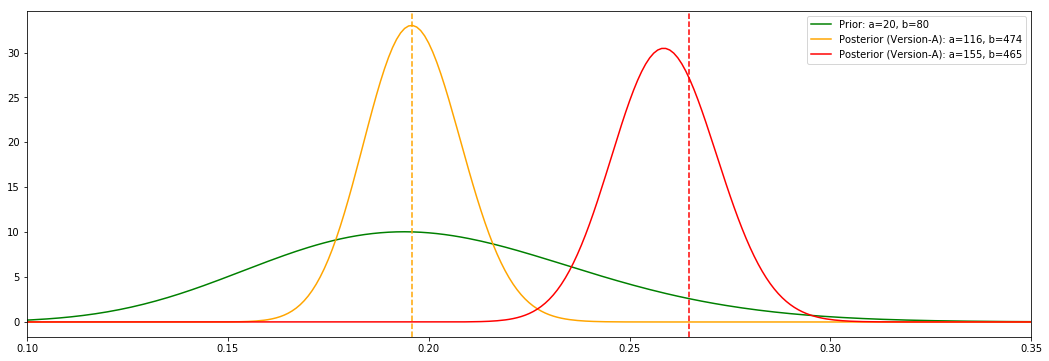

In [6]:
plt.figure(figsize=(18,6))
x = np.arange(0,1,0.001);y0 = beta.pdf(x, 20, 80);plt.plot(x, y0, label='Prior: a=20, b=80',c='g')

ya = beta.pdf(x, updated_alpha_version_a, updated_beta_version_a);
plt.plot(x, ya, label='Posterior (Version-A): a=116, b=474',c='orange')
plt.axvline(0.195918, c='orange', linestyle='dashed')

yb = beta.pdf(x, updated_alpha_version_b, updated_beta_version_b);
plt.plot(x, yb, label='Posterior (Version-A): a=155, b=465',c='red')
plt.axvline(0.264706, c='red', linestyle='dashed')

plt.xlim(0.1,0.35)
plt.legend()

### Observations:

* From the above plot, we observe that the <b>point estimates (CTR) for version-a and version-b are in dashed lines (orange and red) respectively.</b> We observe the <b>Green distribution is the chosen 'prior'</b>, and the posterior of version-a and version-b are in Orange and Red Beta Distributions.


* We observe that the <b>posterior mean for version-b (Beta distribution in red), has a slightly lower mean</b>, when compared to its point estimate (with respect to Bayesian, point estimate over-estimates the CTR).

### Uplift Distribution:

* Now, let us calculate the uplift (version-a to version-b), by the following formula, and plot the pdf and cdf of uplift distribution below. For sampling, we sample 10000 data points from each of the Beta posteriors and find the difference.

$$Uplift = Ratio_{Beta} (Version_B/ Version_A)$$


* From the CDF of Ratio of Posterior Betas (Uplift CDF), every sample after 0 on the x-axis, corresponds to the sample where there is some level of uplift, whereas points below 0 have less<1 uplift (version-a works better). Just by calculating areas under Pdf the curve for values > 0 and values <0, we can provide conclusions.

Text(0.5, 1.0, 'CDF of Uplift')

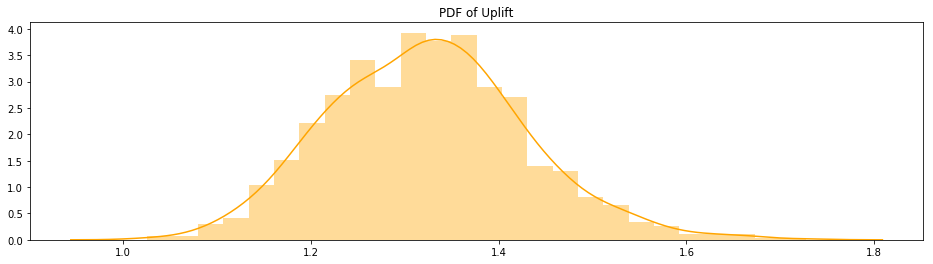

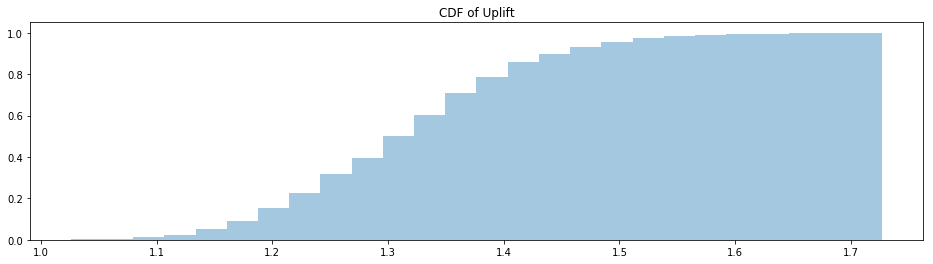

In [7]:
np.set_printoptions(suppress=True)

# data sampling simulation
monte_carlo_ya = beta.rvs(updated_alpha_version_a, updated_beta_version_a, size=1000)

monte_carlo_yb = beta.rvs(updated_alpha_version_b, updated_beta_version_b, size=1000)

# difference in Beta distributions
diff = np.array(monte_carlo_yb)/np.array(monte_carlo_ya)

plt.figure(figsize=(16,4))
sns.distplot(diff, color='orange')
plt.title('PDF of Uplift')

plt.figure(figsize=(16,4))
kwargs = {'cumulative': True}
sns.distplot(diff, hist_kws=kwargs, norm_hist=True, kde=False)
plt.title('CDF of Uplift')

* From the CDF above (Blue plot), we can conclude that X % of samples fall between a lower and upper bound for Uplift ratio. For example, 

## Observations:

### Our assigned task was to answer one simple question: Does version-B work better than Version-A ?

* To answer this question, we approached the problem in two ways; Frequentist and Bayesian. To answer the above question, we need some form of quality/quantity indicator, to effectively communicate our findings. To put the answer in Frequentists terms, it would be something along these lines: 

### Question: 

<b><i>What are your findings from the experiment ? Which version should we use and why ?</i></b>

### Answer:

<b><i> We found that there is a statistically significant increase in CTR for version-b, when compared to version-a, with a p-value <= 0.05.<i/></b>
    
The above answer is correct, it does associate a number/ numeric to show/ convey the strength and confidence in our point estimates. In most cases, the follow-up question would be something like this:

### Follow-up Question:

<b><i>So... Are you 95 % confident in your results ?</i></b>

### Follow-up Answer:

<b><i>Well, not really. We have enough evidence to prove that there is 'some' difference (difference in mean point estimates to be precise). Given the null hypothesis is true, i.e., there is no statistical significant difference between the two versions, there is a 5 % chance that a sample could show up in the alternate hypothesis.<i></b>
    
To simplify the confusion, you ccould choose take the Bayesian approach and say the following:

#### We can conclude that <b>60% of the simulations show an Uplift ratio between 1.22 and 1.42 Uplift ratio</b>, and <b>80% of the simulations show an Uplift ratio between 1.18 and 1.45</b>.

* See the two plots below; we choose 60 % of the simulations data and see the x-axis to report on the uplift ratio, and choose 80 % as shown in the right plot. We can also show <b>Percentage Gain: (B-A)/A </b> as a metric for reporting.

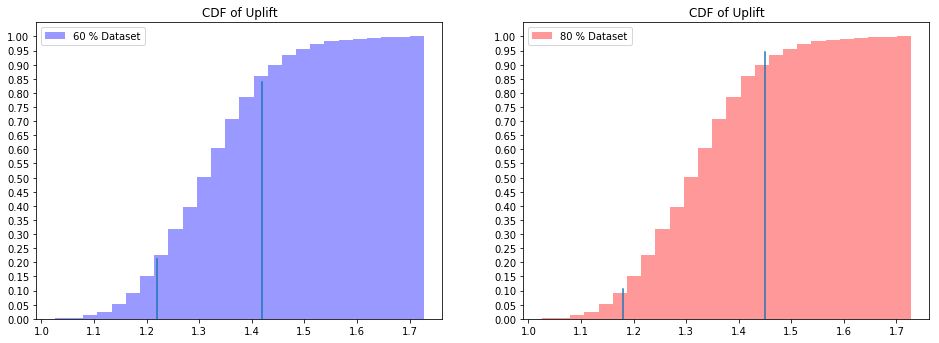

In [8]:
kwargs = {'cumulative': True}

plt.figure(figsize=(16,12));
plt.subplot(2,2,1);
sns.distplot(diff, hist_kws=kwargs, norm_hist=True, kde=False, label='60 % Dataset',color='blue');
plt.yticks(np.arange(0,1.05,0.05))
plt.axvline(1.22,ymin=0,ymax=0.2);plt.axvline(1.42,ymin=0,ymax=0.8);plt.title('CDF of Uplift');plt.legend()

plt.subplot(2,2,2)
sns.distplot(diff, hist_kws=kwargs, norm_hist=True, kde=False, label='80 % Dataset',color='red');
plt.yticks(np.arange(0,1.05,0.05))
plt.axvline(1.18,ymin=0,ymax=0.1);plt.axvline(1.45,ymin=0,ymax=0.9);plt.title('CDF of Uplift');plt.legend()

* Bayesian framework is not as <b>'harsh'</b> as frequestist approach. For statistical tests, t-stat and p-value have hard cutoffs and <b>do not count for incremental or minimal gains/ boost in performance.</b> In bayesian framework, we include <b>priors as well as account for small incremental gains which can make a huge difference at a larger scale.</b>


* Note that there is <b> no question about Power of the Test</b> in Bayesian context. Every update for posterior is based on the prior, and the assumption here is that Beta distribution slowly tends to the 'true' or 'correct' distribution, and not a point estimate. Hence, there is no concept of power in Bayesian statistics.

# Evaluating Bayesian Hypothesis Testing (ROPE, Effect Size & Lift)


* Now, we are going to look at different <b>Evaluation metrics</b> for Bayesian Hypothesis Testing.

In [9]:
# data from experiment
df = pd.DataFrame()
df['clicks_success'] = [192, 225]
df['impressions'] = [980, 1020]
df.index= ['version_a', 'version_b']
df['ctr'] = df['clicks_success']/df['impressions']
df['clicks_faliure'] = df['impressions'] - df['clicks_success']
df

,clicks_success,impressions,ctr,clicks_faliure
version_a,192,980,0.195918,788
version_b,225,1020,0.220588,795


## Higher Posterior Density Interval

* We know that Integral over the area of any Pdf equals to 1. <b>Let us plot a black line (line-1, at y=40); Pdf integral under the line is 1, and area of Pdf above the line is 0.</b>


* As the <b>line goes down (line-2, at y=12), we see that area above the line is around 50 %. </b>At position-3, we see that the <b>area above line-3 is 95%</b>. <b>The corresponding theta (x-axis)</b>, where the area above the line contributes to <b>95 %</b>, is known as the Higher Posterior Density Interval</b>, as shown between the Blue Bars below. At 95 % HPDI, it is similar to choosing dataset such that we set <b>alpha at 0.05.</b>

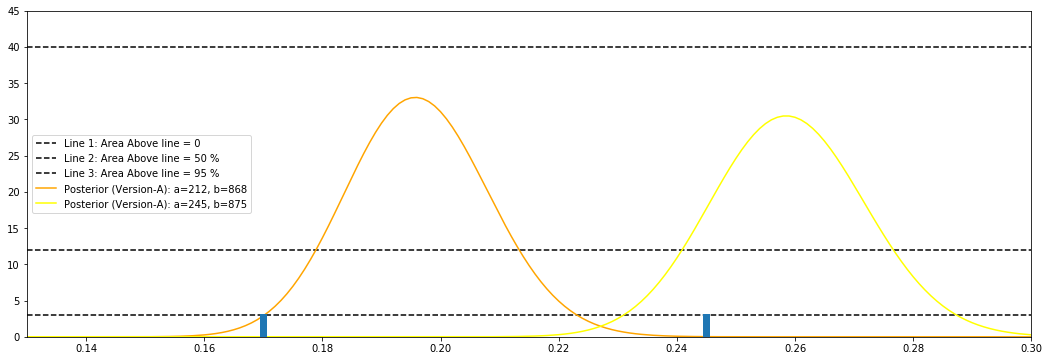

In [10]:
plt.figure(figsize=(18,6));x = np.arange(0,1,0.001)

ya = beta.pdf(x, updated_alpha_version_a, updated_beta_version_a);
plt.axhline(40, color='black', linestyle='dashed', label='Line 1: Area Above line = 0');
plt.axhline(12, color='black', linestyle='dashed', label='Line 2: Area Above line = 50 %');
plt.axhline(3, color='black', linestyle='dashed', label='Line 3: Area Above line = 95 % ');
plt.plot(x, ya, label='Posterior (Version-A): a=212, b=868',c='orange');

yb = beta.pdf(x, updated_alpha_version_b, updated_beta_version_b);
plt.plot(x, yb, label='Posterior (Version-A): a=245, b=875',c='yellow');

plt.axvline(0.17, ymax=0.06, linewidth=7);plt.axvline(0.245, ymax=0.06, linewidth=7);

plt.xlim(0.13,0.3);plt.ylim(0,45);
plt.legend();
plt.show()

<hr>

## Region Of Practical Equivalence (ROPE):

###### Source: https://docs.pymc.io/notebooks/BEST.html

###### Whitepaper:https://pdfs.semanticscholar.org/dea6/0927efbd1f284b4132eae3461ea7ce0fb62a.pdf



* From the paper above <b>(Bayesian Estimation supersedes the t Test)</b>, we note the following: <i>Bayesian estimation also can accept the null value, not only
reject it. The researcher specifies a region of practical equivalence
(ROPE) around the null value, which encloses those values of the
parameter that are deemed to be negligibly different from the null
value for practical purposes. The size of the ROPE will depend on
the specifics of the application domain. As a generic example,
because an effect size of 0.1 is conventionally deemed to be small
(Cohen, 1988), a ROPE on effect size might extend from -0.1 to
0.1.</i>

### ROPE Threshold:

* From the above paper, we see that <b>ROPE limits varies by application and business constraints.</b> In our case, we can choose ROPE of (-0.1, 0.1). Note that we need our <b>metric of interest to fall outside the ROPE region. </b>


### Metric 1: Effect Size:

* We know that effect size can be be calculated by following: $$ES = \frac{\mu_a - \mu_b}{\sigma}$$



<i>If ES = +/- 0.1 %, it means difference in mean CTRs of version-a and version-b, is only 10 % of the combined Standard Deviation. Hence, let us look at two sets of experiments below.</i>

In [11]:
import abyes
import warnings
warnings.filterwarnings(action='ignore')

#### Experiment 1:

* We find that the mean CTR for version-a is 0.20 and version-b is 0.25, after 1000 samples each. We run Monte Carlo simulation and sample 10000 points and find the lift.

#### Experiment 2:

* We find that the mean CTR for version-a is 0.20 and version-b is 0.4, after 1000 samples each. We run Monte Carlo simulation and sample 10000 points and find the lift.

In [12]:
# experiment 1 data sampling for version-a and version-b
data_exp1 = [np.random.binomial(1, 0.20, size=1000), np.random.binomial(1, 0.25, size=1000)]

# experiment 2 data sampling for version-a and version-b
data_exp2 = [np.random.binomial(1, 0.20, size=1000), np.random.binomial(1, 0.4, size=1000)]

In [13]:
# exp1's std devs for version-a, version-b
exp1_version_a_std = np.sqrt((0.2*(1-0.2))/ (1000))
exp1_version_b_std = np.sqrt((0.25*(1-0.25))/ (1000))

# exp2's std devs for version-a, version-b
exp2_version_a_std = np.sqrt((0.2*(1-0.2))/ (1000))
exp2_version_b_std = np.sqrt((0.4*(1-0.4))/ (1000))

exp1_version_a_std, exp1_version_b_std, exp2_version_a_std, exp2_version_b_std

(0.01264911064067352,
 0.013693063937629153,
 0.01264911064067352,
 0.015491933384829668)

### Calculating Effect Size for both experiments:

In [14]:
ES1 = ((data_exp1[1].mean()/1000) - 
       (data_exp1[0].mean()/1000))/(np.sqrt(exp1_version_a_std**2 + 
                                                          exp1_version_b_std**2))

ES2 = ((data_exp2[1].mean()/1000) - 
       (data_exp2[0].mean()/1000))/(np.sqrt(exp2_version_a_std**2 + 
                                                          exp2_version_b_std**2))

In [15]:
ES1, ES2

(0.0018239020546717876, 0.011449999999999998)

# Evaluating Experiment using Effect Size:

* To evaluate our experiment, we can use either <b> Effect Size</b> or  <b>Lift Distribution</b>, against <b>ROPE</b> Metric, which is a design choice. From the above, we found the Effect size for both our experiments. (Remember, CTRs of both versions in experiment are very close to each other).


* As shown below, after conduting experiment 1, we see the <b>ROPE metric</b>, from <b> (-0.1 to 0.1)</b>, around the null Effect size, plaotted in <b>Green</b>. See how the Pdf of <b>Effect size falls (in Blue), coincides with the Green region </b>. <b>Hence, we are not confident that there might be a large enough effect, and result in Inconclusive.</b>


*** abyes ***

Method = analytic
Decision Rule = rope
Alpha = 0.95
Rope = (-0.1, 0.1)
Decision Variable = es

Result is inconclusive.



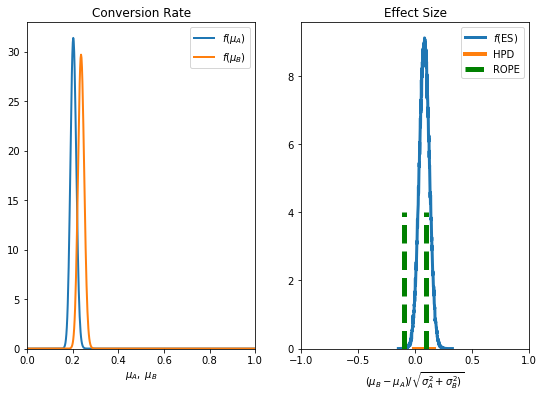

In [16]:
exp1 = abyes.AbExp(method='analytic', decision_var = 'es', rule='rope', rope=(-0.1,0.1), alpha=0.95, plot=True)
exp1.experiment(data_exp1)

* From below, after conduting experiment 2, we see the <b>ROPE metric</b>, from <b> (-0.1 to 0.1)</b>, around the null Effect size, plaotted in <b>Green</b>, similar to previous setup. See how the Pdf of <b>Effect size does NOT (in Blue), coincide with the Green region </b>. <b>Hence, we can conclusively report that version-B works better than version-A.</b>


*** abyes ***

Method = analytic
Decision Rule = rope
Alpha = 0.95
Rope = (-0.1, 0.1)
Decision Variable = es

Result is conclusive: B variant is winner!



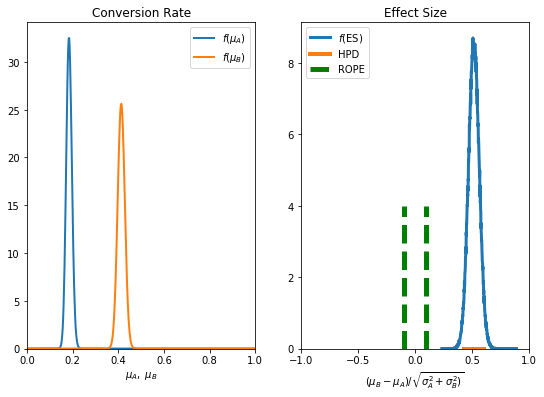

In [17]:
exp2 = abyes.AbExp(method='analytic', decision_var = 'es', rule='rope', rope=(-0.1,0.1), alpha=0.95, plot=True)
exp2.experiment(data_exp2)

* Hence, we know that having a <b> larger Effect Size </b> finds a large difference between CTRs for different versions. ES is the percent of mean difference to combined standard deviation. Hence, having either <b>large difference in CTR (numerator), and larger number of Samples (As n-increases, S.D. decreases)</b>.

# Evaluating Experiment using Lift


## Metric 2: Lift

* We can also look at the Lift (Distribution of Difference between versions), and look at the cut-off with respect to <b>ROPE</b> around the null lift point. Similar to conclusions from the above Effect Size method, we arrive to the same conclusions below.


*** abyes ***

Method = analytic
Decision Rule = rope
Alpha = 0.95
Rope = (-0.1, 0.1)
Decision Variable = lift

* Result is conclusive: A and B variants are effectively equivalent!



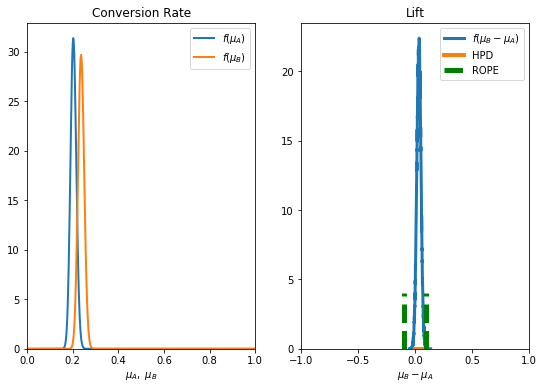

In [18]:
# running experiment 1
exp1 = abyes.AbExp(method='analytic', decision_var = 'lift', rule='rope', rope=(-0.1,0.1), alpha=0.95, plot=True)
exp1.experiment(data_exp1)


*** abyes ***

Method = analytic
Decision Rule = rope
Alpha = 0.95
Rope = (-0.1, 0.1)
Decision Variable = lift

Result is conclusive: B variant is winner!



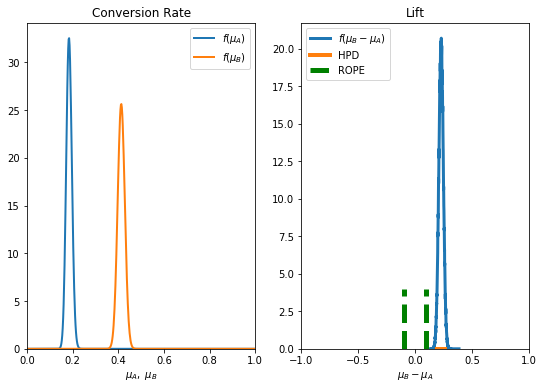

In [19]:
# running experiment 2
exp2 = abyes.AbExp(method='analytic', decision_var = 'lift', rule='rope', rope=(-0.1,0.1), alpha=0.95, plot=True)
exp2.experiment(data_exp2)

# Which metric works the best between Effect Size and Lift ?

* Thinking about the <b>criteria for conlusiveness, there is a slight difference between both metrics.</b> Observe how Uplift does not consider sample size at all (Uplift is only difference in mean CTRs), whereas Effect Size takes <b> Combined Standard Deviation into consideration.</b>


$$ES = \frac{\mu_b - \mu_a}{\sqrt{\sigma_a^2 + \sigma_b^2}}$$


* By doing so, as the number of <b>samples increase; and <i>given</i> more samples occur closer to the mean (High Sample size and Low Deviation), increases the overall value of Effect Size. Hence, generally speaking, Effect size makes more sense than absolute uplift alone (This makes more difference as sample sizes increase and deviation is low).</b>